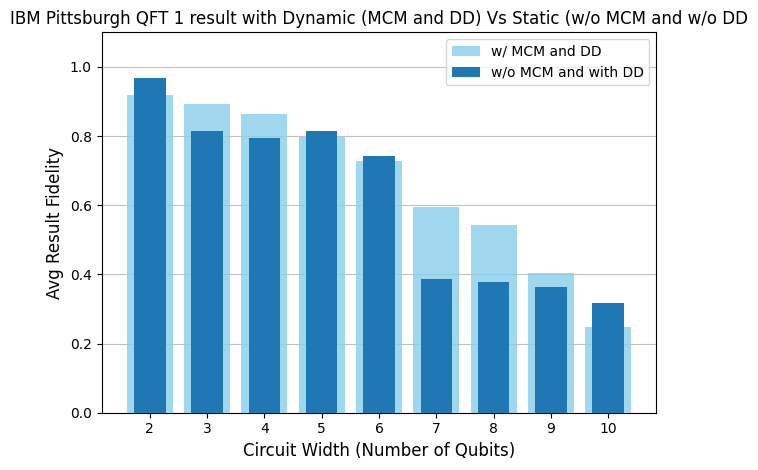

In [101]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load JSON data
with open('/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_pittsburgh_qft1_true_wDD_opt3.json') as f:
    data_true = json.load(f)
with open('/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_pittsburgh_qft1_false_w0DD_opt3_run2.json') as f:
    data_false = json.load(f)

# Extract the single top‑level key and its group_metrics
key_true = next(iter(data_true))
key_false = next(iter(data_false))
gm_true = data_true[key_true]['group_metrics']
gm_false = data_false[key_false]['group_metrics']

# Groups (2 through 10 qubits) and labels
groups = list(map(int, gm_true['groups']))
xlabels = groups

# Average fidelities and std‑errors
avg_true   = gm_true['avg_fidelities']
std_true   = gm_true.get('std_fidelities',   [0]*len(avg_true))
avg_false  = gm_false['avg_fidelities']
std_false  = gm_false.get('std_fidelities',  [0]*len(avg_false))

# Create plot
fig, ax = plt.subplots()

# Title
ax.set_title('IBM Fez QFT 1 result with Dynamic (MCM and DD) Vs Static (w/o MCM and w/o DD')

ax.set_ylim([0, 1.1])
ax.grid(True, axis='y', color='silver', zorder=0)
ax.set_xlabel('Circuit Width (Number of Qubits)', fontsize = 12)
ax.set_ylabel('Avg Result Fidelity', fontsize = 12)
ax.set_xticks(groups)
ax.set_xticklabels(xlabels)

# Overlapping bars: first “true” in skyblue, then “false” narrower on top
ax.bar(groups,
       avg_true,
       color='skyblue',
       alpha=0.8,
       zorder=3)
ax.bar(groups,
       avg_false,
       width=0.55,
       zorder=3)


# Legend
ax.legend(['w/ MCM and DD', 'w/o MCM and with DD'], loc='upper right')

plt.tight_layout()

# Save the figure to file
fig.savefig('fidelity_comparison_qft2_with_static_vs_Dynamic_wDD.pdf', dpi=300, bbox_inches='tight')

plt.show()



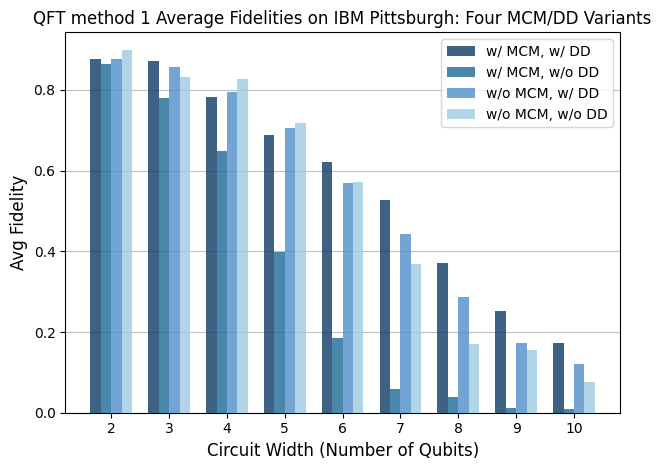

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

def load_group_metrics(path):
    with open(path) as f:
        d = json.load(f)
    key = next(iter(d))
    gm = d[key]['group_metrics']
    groups = list(map(int, gm['groups']))
    avg = gm['avg_fidelities']
    #avg = gm['avg_exec_times']
    std = gm.get('std_fidelities', [0]*len(avg))
    return groups, avg, std

# ---- Replace these with your actual four files and descriptive labels ----
#QFT 1 IBM PITTSBURGH
# datasets = [
#     ("w/ MCM, w/ DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_pittsburgh_qft1_true_wDD_opt3.json"),
#     ("w/ MCM, w/o DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_pittsburgh_qft1_true_w0_DD_opt3.json"),
#     ("w/o MCM, w/ DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_pittsburgh_qft1_false_wDD_opt3.json"),
#     ("w/o MCM, w/o DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_pittsburgh_qft1_false_w0_DD_opt3.json"),
# ]

#QFT1 IBM FEZ
datasets = [
    ("w/ MCM, w/ DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qft1_true_wDD_fez.json"),
    ("w/ MCM, w/o DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qft1_true_wO_DD_fez.json"),
    ("w/o MCM, w/ DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qft1_false_wDD_run2.json"),
    ("w/o MCM, w/o DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qft1_false_w0DD_run2_opt1.json"),
]
# -------------------------------------------------------------------------


#QFT2 IBM FEZ
# datasets = [
#     ("w/ MCM, w/ DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qft2_true_wDD_run2_aug8.json"),
#     ("w/ MCM, w/o DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qft2_true_w0DD_aug9.json"),
#     ("w/o MCM, w/ DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qft2_false_wDD_aug9.json"),
#     ("w/o MCM, w/o DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qft2_false_w0DD_aug9.json"),
# ]

#QPE on IBM FEZ
# datasets = [
#     ("w/ MCM, w/ DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qpe_true_wDD_aug11.json"),
#     ("w/ MCM, w/o DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qpe_true_w0DD_aug11.json"),
#     ("w/o MCM, w/ DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qpe_false_wDD_run2.json"),
#     ("w/o MCM, w/o DD", "/home/cudaq/QC-App-Oriented-Benchmarks/__data/DATA-ibm_fez_qpe_false_w0DD_aug11.json"),
# ]

# Load all and verify groups are the same
loaded = []
for label, path in datasets:
    groups, avg, std = load_group_metrics(path)
    loaded.append({"label": label, "groups": groups, "avg": avg, "std": std})

# Use the groups from the first dataset as the x-axis base
base_groups = loaded[0]["groups"]
x = np.arange(len(base_groups))

# Bar grouping parameters
num_sets = len(loaded)
width = 0.18  # tune so total width fits (e.g., num_sets * width < ~0.8)
offsets = (np.arange(num_sets) - (num_sets - 1) / 2) * width  # centered

# Create plot
fig, ax = plt.subplots()

ax.set_title('QFT method 1 Average Fidelities on IBM Pittsburgh: Four MCM/DD Variants')
#ax.set_ylim([0, 1.1])
ax.grid(True, axis='y', color='silver', zorder=0)
ax.set_xlabel('Circuit Width (Number of Qubits)', fontsize=12)
ax.set_ylabel('Avg Fidelity', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(base_groups)

# Choose colors or let matplotlib cycle if you prefer not to hardcode
colors = ['#0d3b66', '#1d6996', '#4f8fc9', '#9ecae1']  # example palette

for i, entry in enumerate(loaded):
    if entry["groups"] != base_groups:
        raise ValueError(f"Group mismatch in dataset {entry['label']}")
    ax.bar(
        x + offsets[i],
        entry["avg"],
        width=width,
        label=entry["label"],
        zorder=3,
        color=colors[i] if i < len(colors) else None,
        alpha=0.8,
    )

# Legend
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()

# Save
fig.savefig('avg_fidelities_comparison_QFT2_Pittsburgh.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [25]:
# --- Pairwise % difference between w/ MCM, w/ DD and each other variant ---

import pandas as pd
import numpy as np

ref_label = "w/ MCM, w/ DD"
ref_entry = next(e for e in loaded if e["label"] == ref_label)
ref_vals = np.array(ref_entry["avg"], dtype=float)

results = {}
for e in loaded:
    if e["label"] == ref_label:
        continue
    other_vals = np.array(e["avg"], dtype=float)
    pct_diff = (ref_vals - other_vals) / other_vals * 100.0
    results[f"{ref_label} vs {e['label']}"] = pct_diff

df_diffs = pd.DataFrame(results, index=ref_entry["groups"])
df_diffs.index.name = "Circuit width (qubits)"
df_diffs = df_diffs.round(2)

print("Pairwise % differences (positive = MCM+DD > other):")
display(df_diffs)

# Save
csv_path = "pairwise_pct_diffs_MCM_DD.csv"
df_diffs.to_csv(csv_path)
print(f"Saved to {csv_path}")


Pairwise % differences (positive = MCM+DD > other):


,"w/ MCM, w/ DD vs w/ MCM, w/o DD","w/ MCM, w/ DD vs w/o MCM, w/ DD","w/ MCM, w/ DD vs w/o MCM, w/o DD"
Circuit width (qubits),,,
2,-3.54,-5.27,-5.47
3,39.84,-6.53,-5.83
4,29.84,-7.15,-8.38
5,18.84,-21.25,-21.72
6,22.98,-13.60,-15.75
7,91.90,-4.22,1.49
8,135.98,-7.19,11.53
9,283.15,10.00,88.40
10,432.65,20.28,97.73


Saved to pairwise_pct_diffs_MCM_DD.csv


In [27]:
# --- Average % difference for circuit widths >= 6 qubits ---

# Filter for rows with circuit width >= 6
df_ge6 = df_diffs[df_diffs.index >= 6]

# Compute the column-wise average
avg_ge6 = df_ge6.mean().round(2)

print("Average % differences of QPE for circuit width >= 6 qubits:")
display(avg_ge6.to_frame("Avg % difference (≥6 qubits)"))

# Optionally save
avg_ge6.to_csv("avg_pct_diffs_ge6.csv", header=["Avg % difference (≥6 qubits)"])


Average % differences of QPE for circuit width >= 6 qubits:


,Avg % difference (≥6 qubits)
"w/ MCM, w/ DD vs w/ MCM, w/o DD",193.33
"w/ MCM, w/ DD vs w/o MCM, w/ DD",1.05
"w/ MCM, w/ DD vs w/o MCM, w/o DD",36.68
